<a href="https://colab.research.google.com/github/zezeko/tf_specialization/blob/master/cnns/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [39]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        data = np.genfromtxt(training_file, skip_header=1, delimiter=',', dtype=float)
        temp_labels = []
        temp_images = []
        for row in data:
          temp_labels.append(row[0])
          temp_images.append(np.array_split(row[1:785], 28))
        images = np.array(temp_images).astype(float)
        labels = np.array(temp_labels).astype(float)
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [41]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
      rescale = 1./255,
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [51]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')]
    )

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.train.AdamOptimizer(), metrics=['accuracy'])

# Train the Model
train_generator = train_datagen.flow(training_images, training_labels, batch_size=32)

validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=32)  

history = model.fit_generator(train_generator, 
                              steps_per_epoch =len(training_images) / 32,
                              epochs=15, 
                              validation_data = validation_generator, 
                              validation_steps=len(testing_images) / 32,
                              verbose = 1)

model.evaluate(testing_images/255.0, testing_labels)

# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
858/857 [==============================] - 52s 60ms/step - loss: 2.8250 - acc: 0.1419 - val_loss: 1.9408 - val_acc: 0.3760
Epoch 2/15
858/857 [==============================] - 51s 59ms/step - loss: 2.1660 - acc: 0.3174 - val_loss: 1.4322 - val_acc: 0.4965
Epoch 3/15
858/857 [==============================] - 52s 61ms/step - loss: 1.8300 - acc: 0.4182 - val_loss: 1.1998 - val_acc: 0.5909
Epoch 4/15
858/857 [==============================] - 51s 59ms/step - loss: 1.5972 - acc: 0.4830 - val_loss: 1.1904 - val_acc: 0.5838
Epoch 5/15
858/857 [==============================] - 51s 59ms/step - loss: 1.4545 - acc: 0.5285 - val_loss: 0.9251 - val_acc: 0.6788
Epoch 6/15
858/857 [==============================] - 51s 60ms/step - loss: 1.3308 - acc: 0.5643 - val_loss: 0.8599 - val_acc: 0.6859
Epoch 7/15
858/857 [==============================] - 51s 60ms/step - loss: 1.2447 - acc: 0.5875 - val_loss: 0.7141 - val_acc: 0.7444
Epoch 8/15
858/857 [==============================] - 51s 59ms

[6.92426086682151, 0.56609035]

In [52]:
model.evaluate(testing_images/255.0, testing_labels)


7172/7172 [==============================] - 3s 435us/sample - loss: 0.4825 - acc: 0.8391


[0.48245272504106557, 0.8390965]

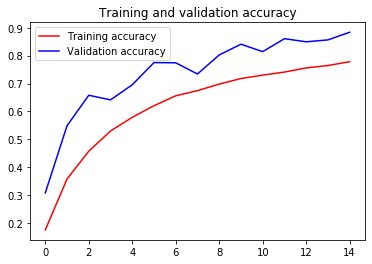

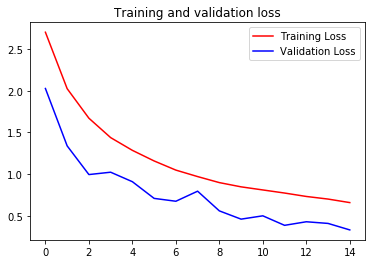

In [48]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()